In [2]:
import ising_efficient
import network_generation
import jax.numpy as jnp
import jax
import numpy as np
import matplotlib.pyplot as plt

201
201
201
3


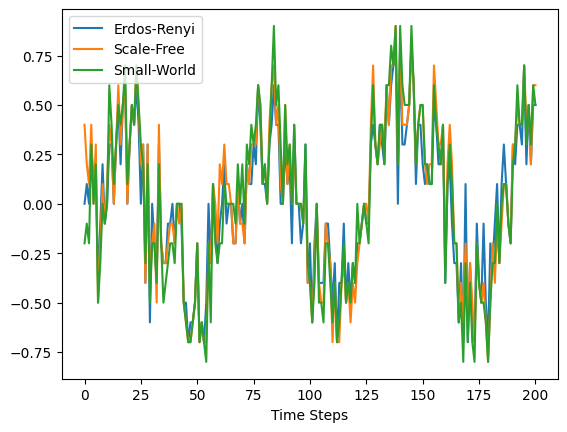

In [ ]:
num_nodes = 10
weight_range = (.1, .2)
seed = None

adj_matrices = []
adj_matrices.append(network_generation.generate_erdos_renyi_sparse_adjacency_matrix(
    num_nodes=num_nodes, edge_prob=0.1, weight_range=weight_range, seed=seed
))
adj_matrices.append(network_generation.generate_scale_free_sparse_adjacency_matrix_jax(
    num_nodes=num_nodes, num_edge=2, weight_range=weight_range, seed=seed
))
adj_matrices.append(network_generation.generate_small_world_sparse_adjacency_matrix_jax(
    num_nodes=num_nodes, k=4, p=0.3, weight_range=weight_range, seed=seed
))

ones_init = jnp.ones(shape=(len(adj_mat),)).astype(int)
results_per_world = {'erdos_renyi': [], 'scale_free': [], 'small_world': []}
for adj_mat, world_type in zip(adj_matrices, results_per_world.keys()):
    random_init = jax.random.randint(
        shape=(len(adj_mat),),
        minval=-1,
        maxval=2,
        key=jax.random.PRNGKey(np.random.randint(low=0, high=100)),
    )
    network = ising_efficient.BeliefNetwork(
        sparse_adj=adj_mat,
        external_field=lambda t, node_idx: jnp.sin(t * 0.1),
        init_state=ones_init,
        µ=0.9,
        beta=0.5,
    )
    results_per_world[world_type] = network.run_for_steps(200, seed=seed)

print(len(results_per_world['erdos_renyi']))
print(len(results_per_world['scale_free']))
print(len(results_per_world['small_world']))
    
results_per_world_data = [np.mean(np.asarray(results_per_world[world_type]), axis=1) for world_type in results_per_world.keys()]
print(len(results_per_world_data))

plt.plot(results_per_world_data[0], label='Erdos-Renyi')
plt.plot(results_per_world_data[1], label='Scale-Free')
plt.plot(results_per_world_data[2], label='Small-World')
plt.xlabel('Time Steps')
plt.ylabel('')
plt.legend()


In [ ]:
results_per_world = {'erdos_renyi': [], 'scale_free': [], 'small_world': []}
for adj_mat, world_type in zip(adj_matrices, results_per_world.keys()):
    random_init = jax.random.randint(
        shape=(len(adj_mat),),
        minval=-1,
        maxval=2,
        key=jax.random.PRNGKey(np.random.randint(low=0, high=100)),
    )
    network = ising_efficient.BeliefNetwork(
        sparse_adj=adj_mat,
        external_field=lambda t, node_idx: jnp.sin(t * 0.1),
        init_state=_init,
        µ=0.9,
        beta=0.5,
    )
    results_per_world[world_type] = network.run_for_steps(200, seed=seed)